# Analiza Interakcija Likova Iz Serije Breaking Bad

In [2]:
from pathlib import Path 
from collections import defaultdict
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import pickle

## 1.Učitavanje Podataka

Da bi smo uspešno analizirali interakcije u ovom projektu prvo moramo učitati dataset "brba.csv" koji sadrži imena likova koji su u interakciji u određenoj sceni, sezonu i ukupan broj epizode u kojoj se nalazi ta interakcija.

In [3]:
data = pd.read_csv('brba.csv')
data.head()

,First Characters Name,Second Characters Name,Season,Episode
0,Walter White,Jesse Pinkman,Season 1,Episode 1
1,Walter White,Skyler White,Season 1,Episode 1
2,Walter White,Walt JR,Season 1,Episode 1
3,Skyler White,Walt JR,Season 1,Episode 1
4,Walter White,Walt JR,Season 1,Episode 1


Ovde možemo primetiti da se u našem datasetu nalazi 1719 zabeleženih interakcija između likova. U samom datasetu, u bilo kojoj koloni, ne postoji nijedna null vrednost tako da možemo odmah analizirati podatke bez potrebe za izmenom samih podataka.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First Characters Name   1719 non-null   object
 1   Second Characters Name  1719 non-null   object
 2   Season                  1719 non-null   object
 3   Episode                 1719 non-null   object
dtypes: object(4)
memory usage: 53.8+ KB


Korišćenjem biblioteke NetworkX kreiramo prvo jedan prazan, neusmeren graf koga ćemo nazvati prosto G. Da bi napravili izgled tog grafika moramo da mu dodamo čvorove (u nastavku nodes), koji će predstavljati same likove iz serije, i ivice (u nastavku edges), koje predstavljaju samu interakciju između likova.

In [5]:
G = nx.Graph()

U ovom koraku su u niz likovi uneta sva jedinstvena imena koja se nalaze u prve dve kolone našeg dataseta. 


(Pošto su lično unešavani podaci za svrhe ovog projekta došlo do sitnijih grešaka tokom unosa. Naime Skyler White i Skinny Pete su zauzimali dva različita mesta u datasetu, jer se pri unošenju podataka promakao znak za razmak. Pored toga likovi kao Kaylee Erhmantraut i Austin Ramsey su imali u nekim redovima loše napisana imena, redom Kailee Erhmantraut i Austin Ramey. Tokom izrade projekta svaki slučaj je ispravljen i sva imena su nameštena na prava)

U ćeliji ispod su ispisana sva imena koja su se našla u ovom datasetu i to redom kako su se pojavljivali u seriji.

In [6]:
likovi = pd.unique(data[['First Characters Name', 'Second Characters Name']].values.ravel())
print(likovi)



['Walter White' 'Jesse Pinkman' 'Skyler White' 'Walt JR' 'Bogdan'
 'Marie Schrader' 'Hank Schrader' 'Steven Gomez' 'Doctor #1'
 'Emilio Koyama' 'Krazy 8' 'Student #1' 'Backhoe operator' 'Student #2'
 'Gretchen Schwartz' 'Wendy' 'Combo' 'Skinny Pete' 'Ken' 'Diane Pinkman'
 'Adam Pinkman' 'Jake Pinkman' 'Dr Delcavoli' 'Badger' 'Elliott Schwartz'
 'Hugo Archilleya' 'Carmen Molina' 'Tuco Salamanca' 'No-Doze' 'Gonzo'
 'Tim Roberts' 'Hector Salamanca' 'Austin Ramsey' 'George Merkert'
 'Psychiatrist' 'Paul Tyree' 'Clovis' 'Jane Margolis' 'Spooge'
 "Spooge's Wife" "Spooge's Son" 'Student #3' 'Ted Beneke' 'Vanco'
 'Tortuga' 'Getz' 'Saul Goodman' 'Donald Margolis' 'Tweaky Dude'
 'Rival Dealers' 'Tomas Cantillo' 'Gustavo Fring' 'Victor' 'Holly White'
 'Mike Ehrmantraut' 'Marco Salamanca' 'Leonel Salamanca' 'Pamela Orbic'
 'Group Leader' 'Policeman #1' 'Kaylee Erhmantraut' 'Juan Bolsa'
 'Policeman #2' 'Louis Corbett' 'Cara' "Combo's Mother" 'Policeman #3'
 'Gale Boetticher' 'Old Joe' 'Francesca' '

In [7]:
G.add_nodes_from(likovi)


Pored node-a potrebni su nam u edges kako bi zaista kreirali graf. 

Tako prolazeći kroz dataset red po red i pamtiti koliko puta su neki likovi interagovali (nevezano ko je u koloni 1 ili 2). Sa svakom novom interakcijom edge ta dva lika bi dobio na težini (u projektu weight), koja nam kasnije služi da bi jasnije videli ko je češće bio sa kim u sceni.

Potom ponovo imamo ispisana imena svih likova, sada nodeova, i njihov ukupan broj koji je 101.
Pored toga imamo i prikaz svakog edge-a i broja ponavljivanja u dataset, na primer Walter White i Jesse Pinkman imaju 158 interakcija kroz celu seriju po našim kriterijumima.
Ukupan broj edgeva iznosi 302.

In [8]:
for _, row in data.iterrows():
    c1 = row['First Characters Name']
    c2 = row['Second Characters Name']
    
    if G.has_edge(c1, c2):
        G[c1][c2]['weight'] += 1
    else:
        G.add_edge(c1, c2, weight=1)

print("Cvorovi:", G.nodes())
print("Grane sa tezinama:", G.edges(data=True))
print("Broj cvorova: ", G.number_of_nodes())
print("Broj grana: ", G.number_of_edges())

Cvorovi: ['Walter White', 'Jesse Pinkman', 'Skyler White', 'Walt JR', 'Bogdan', 'Marie Schrader', 'Hank Schrader', 'Steven Gomez', 'Doctor #1', 'Emilio Koyama', 'Krazy 8', 'Student #1', 'Backhoe operator', 'Student #2', 'Gretchen Schwartz', 'Wendy', 'Combo', 'Skinny Pete', 'Ken', 'Diane Pinkman', 'Adam Pinkman', 'Jake Pinkman', 'Dr Delcavoli', 'Badger', 'Elliott Schwartz', 'Hugo Archilleya', 'Carmen Molina', 'Tuco Salamanca', 'No-Doze', 'Gonzo', 'Tim Roberts', 'Hector Salamanca', 'Austin Ramsey', 'George Merkert', 'Psychiatrist', 'Paul Tyree', 'Clovis', 'Jane Margolis', 'Spooge', "Spooge's Wife", "Spooge's Son", 'Student #3', 'Ted Beneke', 'Vanco', 'Tortuga', 'Getz', 'Saul Goodman', 'Donald Margolis', 'Tweaky Dude', 'Rival Dealers', 'Tomas Cantillo', 'Gustavo Fring', 'Victor', 'Holly White', 'Mike Ehrmantraut', 'Marco Salamanca', 'Leonel Salamanca', 'Pamela Orbic', 'Group Leader', 'Policeman #1', 'Kaylee Erhmantraut', 'Juan Bolsa', 'Policeman #2', 'Louis Corbett', 'Cara', "Combo's Moth

## 2.Crtanje Grafika

U ovom delu projekta je sada važno da izvučemo sve podatke direktno koji nam mogu pomoći u crtanju lepšeg i jednostavnijeg grafika za analizu.

Prvo, za svakog lika u skupu node-ova, izračunat je ponderisani stepen čvorova (weighted degree) koji predstavlja ukupan broj interakcija sa drugim akterima u samoj mreži, tj. meri intenzitet uključenosti aktera u mreži. 

Koristeći sam broj pojavljivanja likova uspešno su napravljeni nizovi, node_sizes i node_colors koji u zavisnosti od samog broja pojavljivanja povećavaju veličinu samog node-a i menjaju njegovu boju

In [9]:
broj_pojavljivanja = dict(G.degree(weight='weight'))

node_sizes = [broj_pojavljivanja[lik] + 1000 for lik in G.nodes()]
node_colors = [broj_pojavljivanja[lik] for lik in G.nodes()]


Naredni korak je samo crtanje grafika.

Dimenzije grafika biće 25,20 i imaće spring_layout sa razmakom izmedju samih node-ova (k) obeleženog sa 5, taj broj je bio optimalan za adekvatan prikaz čvorova, svaki manji broj bi ih previše zgusnuo, dok svaki veći pravi veliku razliku u pregledu bitnijih likova.

U samom projektu je ubačena promenljiva treshold koja trenutno ne pravi nikakvu razliku u grafiku, ali ako se poveća njegova vrednost, grafik će prikazivati samo one edge-eve koji imaju više to threshold broja interakcija sa različitim likovima.

Promenljive edge_weights i edge_width nam pomažu u lepšem izgledu grafika. U zavisnosti od težine jednog edge-a boja i debljina samog edge-a će biti promenjena, što više interakcija sa likovima to je edge deblji.

Zatim su određene sve bitne stavke pri kreiranju izgleda node-ova, edge-eva i naziva likova.

I na kraju su dodata dva colorbara, jedan za boju node-ova (desno) a drugi za boju edge-ova (levo), kako bi jasnija bila slika. 

Sve komponente su zatim imenovane i imamo prikaz samog grafika.

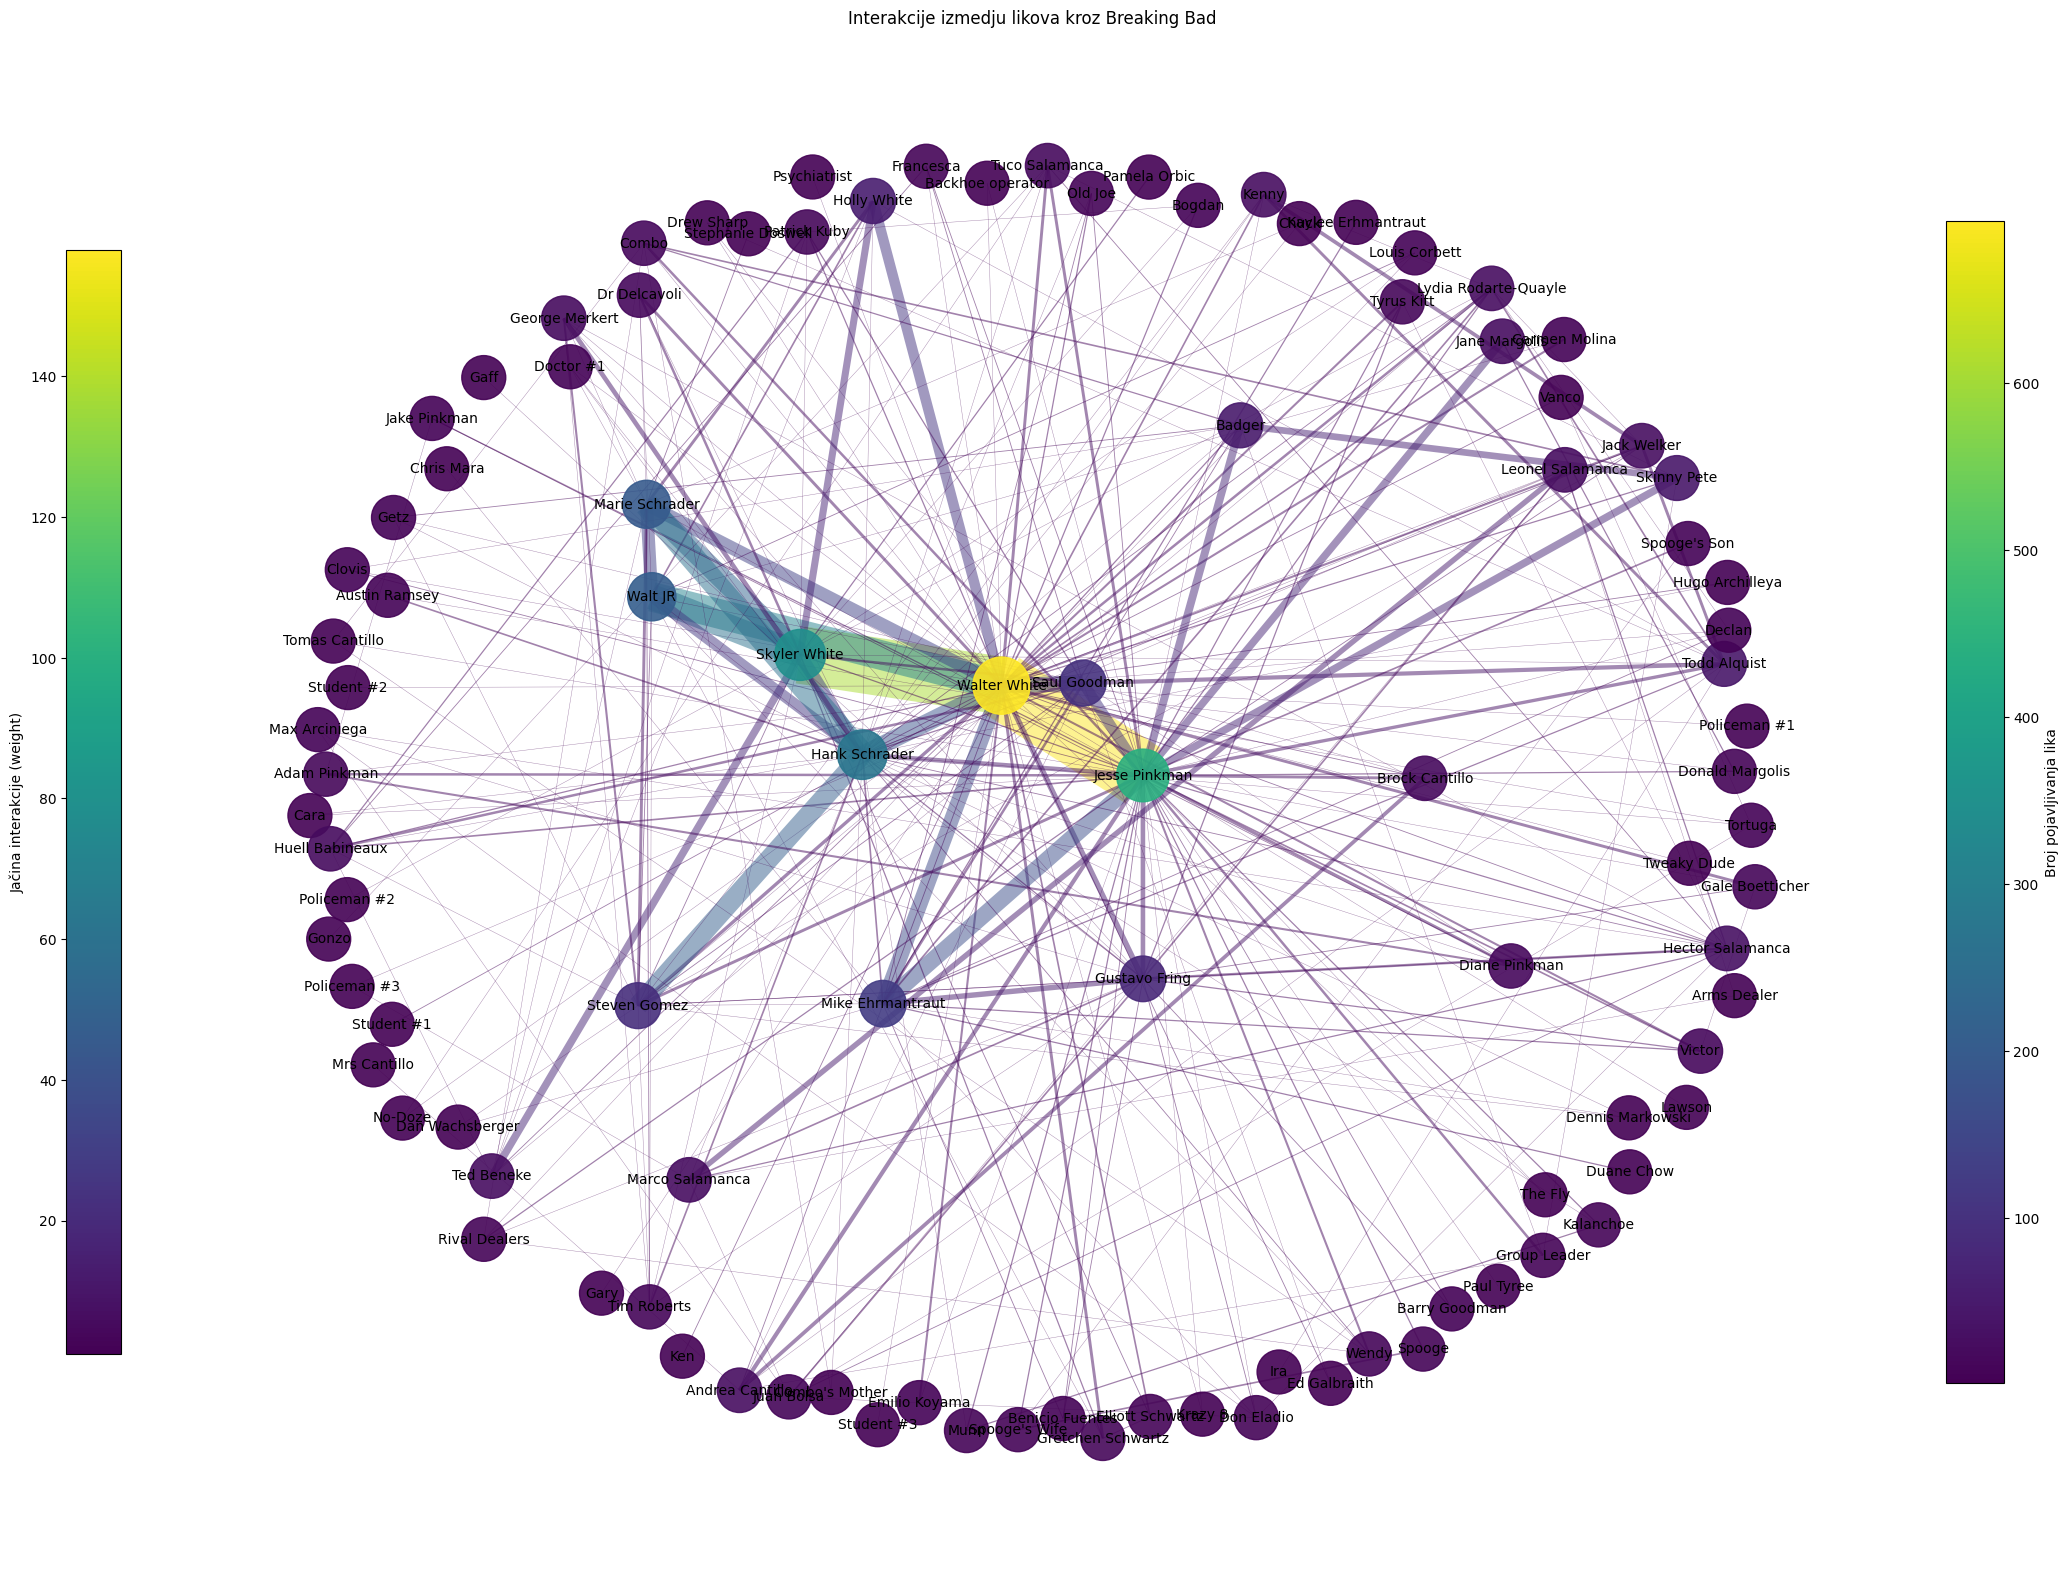

In [22]:
plt.figure(figsize=(25,20))
ax = plt.gca()
pos = nx.spring_layout(G, k=5, iterations=100, weight='weight', seed=42)
threshold = 1
edges_to_draw = [(u,v) for u,v,d in G.edges(data=True) if d['weight'] >= threshold] 

edges = G.edges(data=True)
edge_weights = [d['weight'] for (_,_,d) in edges]
edge_widths = [w*0.3 for w in edge_weights]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=edge_widths, edgelist=edges_to_draw , alpha=0.5, edge_color=edge_weights, edge_cmap=plt.cm.viridis)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Broj pojavljivanja lika", fraction=0.03, pad=0.02)

sm_edges = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                                 norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
sm_edges.set_array([])
plt.colorbar(sm_edges, ax=ax, label="Jačina interakcije (weight)", location='left', fraction=0.03, pad=0.02)

plt.title("Interakcije izmedju likova kroz Breaking Bad")

plt.axis('off')
plt.show()

Na samom grafiku možemo primetiti da se likovi sa znatno velikim brojem pojavljivanja nalaze bliže centru, dok svi ostali prave jedan širi krug oko njih. 
U samom centru, i sa najžućom bojom node-a se nalazi glavni lik Walter White, pa potom na drugom mestu Jesse Pinkman, i na trećem Skyler White. Može se primetiti da su veze između Waltera i Jesse-a i Waltera i Skyler najčešće, što je prikazani jakom debljinom i žutom bojom samog edge-a.

Još neki od značajnih edge-eva su između Waltera i Skyler sa Walt JR-om, sa kojim dele skoru svaku scenu u njihovoj kući, zatim sa ostatkom njihove porodice, Marie i Hank Schrader, koji su supružnici, Marie i Skyler, koje su sestre. Ovih 5 likova često provode porodično vreme međusobno, na raznim ručkovima ili rođendanskim žurkama što se može primetiti na slici.
Pored porodičnih odnosa tu su i poslovni, naime između Hanka i Steve Gomeza, koji su partneri u policiji. Zatim Walter i Jesse često interaguju, i to zajedno, sa Saul Goodmanom, njihovim kriminalnim advokatom, i Mike Erhmantrautom koji je njihov kriminalni partner.

Neke od interakcija koje su na prvi pogled možda trebale da izgledaju češće jesu između Gus Fringa i Waltera i Mikea. Pošto Mike radi direktno za Gusa i samo od njega dobija naređenja, a Gus predstavlja jedan od glavnih prepreka koju Walter mora da pređe kako bi ostavio živ ili nastavio svoj vid posla. Sada ova mala količina interakcija je realan prikaz jer se Gus i Mike prvi put pojavljuju u drugoj sezoni i to odvojeno, a Gus gubi svoj život u poslednjoj epizodi četvrte sezone. Što ostavlja realan prikaz manjeg broja direktnih interakcija između njih iako njegovo prisustvo direktno utiče na njihove živote.
Drugi ovaj iznenađujuć primer je između Jesse-a i njegovih najboljih prijatelja Skinny Pete-a i Badgera koji uglavnom svaku scenu provode sa njim. Iako se možda čini da su tokom serije konstantno zajedno, grafik jasno pokazuje da Skinny Pete i Badger ipak nisu imali toliko vremena za ekranom.

Još neke od značajnijih interakcija su između Skyler, Waltera i Holly White, koja je njhova ćerka. Skyler i Ted Beneke-a koji skoro svaku svoju scenu provodi sa Skyler kao njen šef. Leonel i Marco Salamanca, bliznaci koji bukvalno samo jednu, poslednju scenu ne provode zajedno. Jesse i Jane Mangolis, koja je njegova devojka kroz drugu sezonu i skoro isključivo se nalazi samo u njegovim scenama. Todd Alquist koji provodi petu sezonu kao konačna prepreka u životima Waltera i Jesse-a.

Neki od značajnijih likova u seriji, koji imaju veliki udeo na nju ali iznenađujuće malo interakcija sa durgima su: Tuco Salamanca, Lydia Rodarte-Quayle, Hector Salamanca, Gale Boetticher, Victor i Tyrus.



## 3.Opis Prikupljenih Podataka

Za opis samih podataka korišćen je određeni broj metoda koje nam daju različite udee u same interakcije.

Počećemo od gustine. Metoda density objašnjava koliko je graf povezan, to jest prikazuje odnos između postojećih ivica i maksimalnog broja ivica. Gustina od 0.059 ukazuje da dosta likova ne interaguje sa velikim broje drugih likova, ova metrika jeste realna ali uključuje i razne likove koji mogu da se pojavljuju u samo jednoj ili dve scene ali aktivno vode razgovor sa nekim od galvnih likova, što čini ovaj broj znatno malim.

In [11]:
gustina = nx.density(G)
print("Gustina mreze: ", gustina)

Gustina mreze:  0.0598019801980198


Sledeća metoda connected_components ukazuje na broj povezanih komponenti u grafu, to jest mogućnost određenog lika da dođe u kontakt sa bilo kojim drugim likom preko njihovih direktnih interakcija.

Kako svaki minorni lik biva u sceni koja je sa nekim od glavnih likova, i svako od glavnih je likova je imao bar jednu scenu sa Walterom, ukazuje da je dobijen rezultat da postoji samo jedna komponenta realan.

Kako postoji samo jedna komponenta tako ima smisla da je veličina najveće komponente skup svih čvorova u grafiku koji i jeste 101.

In [12]:
components = list(nx.connected_components(G))
number_of_components = nx.number_connected_components(G)
largest_component_size = len(max(components, key=len))

print("Broj povezanih komponenti: ", number_of_components)
print("Velicina najvece komponente: ", largest_component_size)

Broj povezanih komponenti:  1
Velicina najvece komponente:  101


Analiziranjem raspodele stepena čvorova dobili smo rezultate koje daju izgled heterogene mreže. Naizgled imamo jaku koncentraciju čvorova sa malim stepenom (1-5), nakon toga dolazi to trenda naglog opadanja što ukazuje da se broj likova sa povećanim brojem konekcija sve više smanjuje.    

Pored ovog velikog skupa, likova sa velikim brojem konekcija (40,50,60) je znatno manje i oni predstavljaju određene hub-ove. 
Ovakav tip grafika nam daje do znanja da ova mreža ima "heavy tail" oblik, i izrazitu asimetričnost raspodele. 

Uz prikaz o raspodeli stepena u mreži dodat je i prosečan stepen konekcija (5.98) i medijana (3). Pošto je vidna razlika između medijane i proseka to može biti još jedan dokaz asimetrije raspodele.

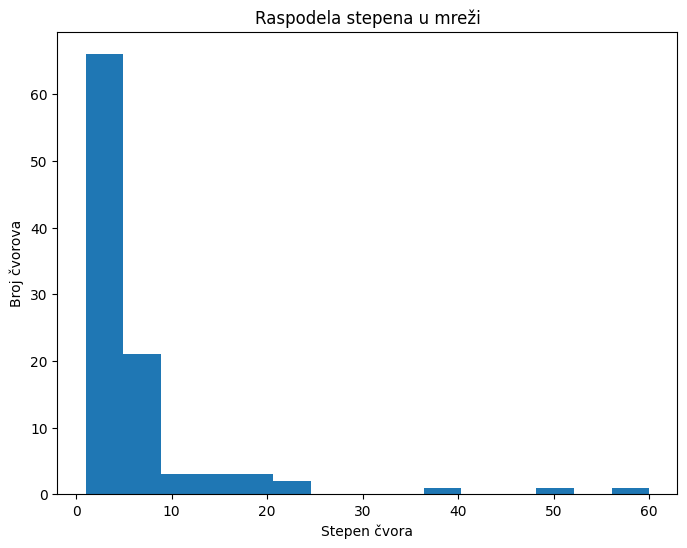

Prosečan stepen: 5.98019801980198
Medijana: 3.0


In [49]:
import numpy as np
degree_values = [d for _, d in G.degree()]

plt.figure(figsize=(8,6))
plt.hist(degree_values, bins=15)
plt.xlabel("Stepen čvora")
plt.ylabel("Broj čvorova")
plt.title("Raspodela stepena u mreži")
plt.show()

print("Prosečan stepen:", sum(degree_values)/len(degree_values))
print("Medijana:", np.median(degree_values))

Pošto preko metode is_connected proveravamo, i saznajemo da je kompleta graf povezan, možemo odrediti dijametar i prosečnu dužinu puta grafa.

Dijametar predstavlja najduži najkraći put između bilo koja dva node-a u mreži i on iznosi 4. Što znači da sa 4 koraka mogu da se spoje najudaljeniji likovi koji nisu interagovali međusobno.

Preko metode average_shortest_path_length znamo da je u proseku najkraći put od jednog do drugog čvora 2.33. 
Pored prosečne dužine najkraćeg puta izračunat je i prosečni koeficijent klasterovanja mreže, to jest koliko su čvorovi oko nekog čvora direktno povezani, i on iznosi 0.61. 

Kombinacija relativno male prosečne dužine puta i visokog prosečnog koeficijenta klasterovanja može ukazivati na postojanje small-world osobina mreže.

In [15]:
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Dijametar grafa: ", diameter)

if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    print("Prosecna duzina puta je: ", avg_path_length)

avg_clustering = nx.average_clustering(G)
print("Prosecni klastering koeficijent: ", avg_clustering)

Dijametar grafa:  4
Prosecna duzina puta je:  2.333069306930693
Prosecni klastering koeficijent:  0.6082382513904259


Koristeći metodu degree_centrality uspeli smo da odredimo koja su top 5 likova sa najvećim stepenom interakcija sa različitim likovima.

Rezultati su redom: Walter White, Jesse Pinkman, Hank Schrader, Skyler White i Gustavo Fring.

Može se primetiti znatan skok između drugog i trećeg mesta jer Walter i Jesse ipak predstavljaju dva glavna lika, dok Skyler i Gus imaju identičan stepen centralnosti.

In [16]:
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti: ", sorted_degree[:5])

Top 5 likova po stepenu centralnosti:  [('Walter White', 0.6), ('Jesse Pinkman', 0.51), ('Hank Schrader', 0.37), ('Skyler White', 0.21), ('Gustavo Fring', 0.21)]


Metodom closeness_centrality možemo dobiti broj koji će predstavaljati koliko je jedan lik u proseku blizu svim ostalim likovima, sa većom vrednošću lik je sve više centralno postavljen na grafiku.

Rezultati su redom: Walter White, Jesse Pinkman, Hank Schrader, Gustavo Fring i Steven Gomez.

Znajući da su Walter i Jesse glavni akteri serije, da Gus vodi glavnu operaciju u Albukerkiju i da je Hank glavni policajac koji juri da sruši njihovu imperiju, glavno iznenađenje je Steve Gomez, koji iako nije jedan od glavnih likova, njegova blizina sa Hankom direktno povećava broj njegovih interakcija sa ostalim akterima.

Vidimo preko pandas serije dole da je prosek ove centralnosti 0.44, da je standardna devijacija 0.065 i da su relativno proporcionalno nalno raspoređeni brojevi po precuntualnim delovima podataka, i to od 0.40 u prvih 25% do 0.46 u ukupnih 75%.

In [17]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti: ", sorted_closeness[:5])

pd.Series(closeness_centrality.values()).describe()

Top 5 likova po blizinskoj centralnosti:  [('Walter White', 0.7142857142857143), ('Jesse Pinkman', 0.6622516556291391), ('Hank Schrader', 0.6060606060606061), ('Gustavo Fring', 0.5405405405405406), ('Steven Gomez', 0.5376344086021505)]


count    101.000000
mean       0.437367
std        0.064761
min        0.319489
25%        0.403226
50%        0.432900
75%        0.465116
max        0.714286
dtype: float64

Pomoću metode betweenness_centrality možemo izračunati kolika je centralnost posredništva za svaki čvor, to jest koliko puta se neki lik nalazi na najkraćem putu između drugih likova.

Rezultati su redom: Walter White, Hank Schrader, Jesse Pinkman, Skyler White i Saul Goodman.

Sa predznanjem da Walter i Jesse interaguju sa najvećim brojem sporednih likova, iznenađenje je druga pozicija Hanka koji je samo u jednoj epizodi u direktnoj interakciji sa likovima ne povezanim glavnim dešavanjima u Albukerkiju.

Vidi se znatni razmak između trećeg i četvrtog mesta gde od rezultata 0.2 padamo na 0.09. Što ukazuje da su Walter, Hank i Jesse glavni likovi koji interaguju sa sporednim, epizodnim likovima.

Skyler i Saul na četvrom i petom mestu ima smisla jer od ostalih likova samo njih dvoje interaguju sa najvećim brojem sporednih likova.

In [18]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva: ", sorted_betweenness[:5])

Top 5 likova po centralnosti posrednistva:  [('Walter White', 0.32346803923474327), ('Hank Schrader', 0.2721492608078873), ('Jesse Pinkman', 0.20850913204789734), ('Skyler White', 0.0914997034390974), ('Saul Goodman', 0.07238419717207595)]


Pored samog ispisa podataka o top 5 likova uveden i grafik čiji elementi su nameštani pomoću degree_centrality-a (veličina čvora) i betweenness_centrality-a (boja čvora, što je boja bliža žutoj to je sama centralnost veća). 

Preko grafika se jasno vidi da je glavni akter, bez pogovora glavni lik Walter White, koji jako prednjači po svim kategorijama centralnosti. Gde je on i najpovezaniji čvor i čvor koji je ključni posrednik u mreži.

Ne tako začuđujuće Hank i Jesse su u obe kategorije na drugom i trećem mestu samo u različitim pozicijama, Jesse prednjači u stepenu a Hank u posredništvu. 

Pored ova tri najvažnija čvora ostali bitni čvorovi su Skyler, Gus i Saul, koji su najstabilniji u obe kategorije u poređenju sa ostalim likovima.

Sama struktura mreže jasno ukazuje da se oko ovih likova okreće cela radnja serije.

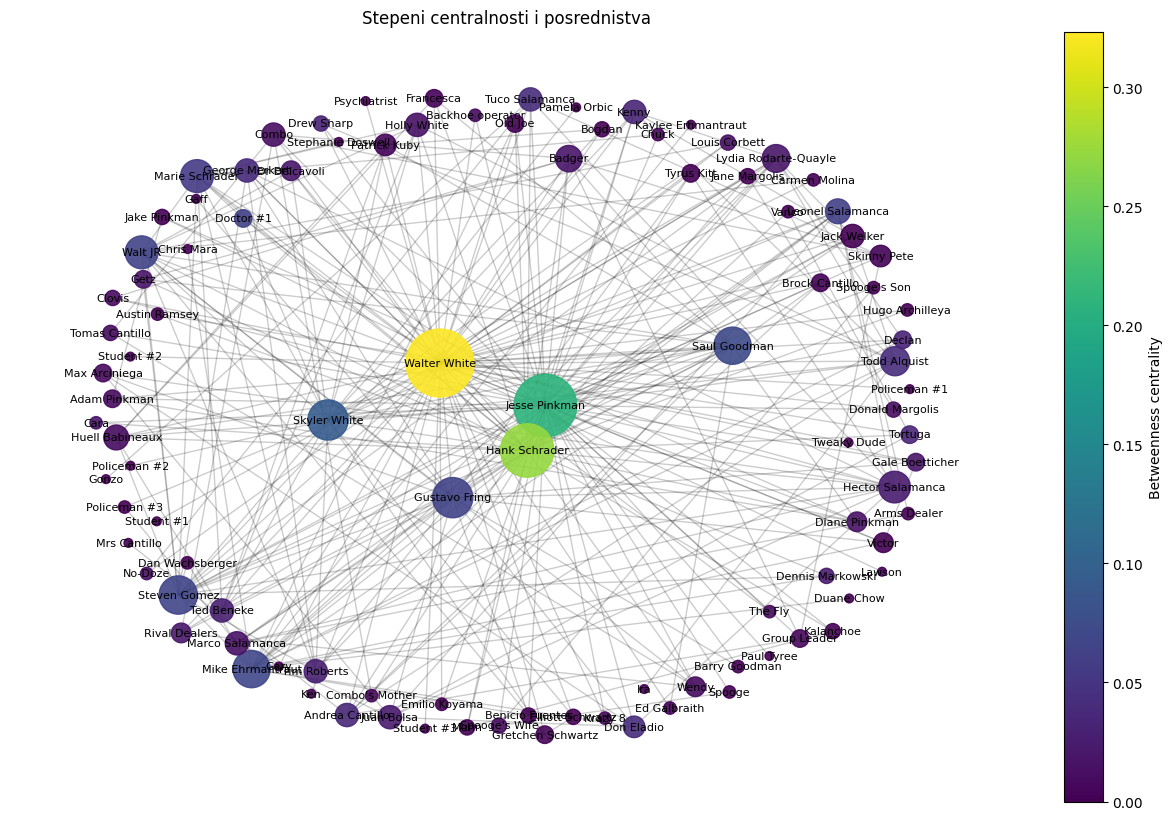

In [52]:
new_node_sizes = [degree_centrality[n]*4000 for n in G.nodes()]  
new_node_colors = [betweenness_centrality[n] for n in G.nodes()]

pos = nx.spring_layout(G, k=4, seed=42, weight='weight')
fig, ax = plt.subplots(figsize=(16, 10))

nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

nodes = nx.draw_networkx_nodes(G, pos, node_size=new_node_sizes,node_color=new_node_colors,cmap=plt.cm.viridis,alpha=0.9,ax=ax)

nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=plt.Normalize(vmin=min(new_node_colors),vmax=max(new_node_colors)))
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Betweenness centrality")

plt.title("Stepeni centralnosti i posrednistva")
plt.axis("off")
plt.show()

I konačno sa metodom eigenvector_centrality računamo koliko je sam čvor važan, što se meri njegovom direktnom povezanošću sa drugim čvorovima koji se nazivaju važnim.

Rezultati su redom: Walter White, Skyler White, Jesse Pinkman, Walt JR i Hank Schrader.

Jedino iznenađenje u ovoj analizi predstavlja Walt JR, koji je najvažniji lik koji nema nikakve veze sa glavnim dešavanjima serije. Njegov eigenvector je veliki iz razloga što je on u direktnom srodstvu sa ostalim važnim likovima (osim Jesse-a), što mu indirektno daje na važnosti.

In [19]:
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti: ", sorted_eigen[:5])

Top 5 likova po eigen centralnosti:  [('Walter White', 0.6164910728078714), ('Skyler White', 0.4391119522815048), ('Jesse Pinkman', 0.3987868097371393), ('Walt JR', 0.29471659219222957), ('Hank Schrader', 0.24430386933179596)]


Koristeći metodu louvain_communities možemo odrediti određene zajednice, ili grupe likova koji imaju sa sobom više interakcija nego sa ostatkom mreže.

Posmatarajući prvi zajednicu (zelena boja) može se odrediti da su to likovi koji okružuju Waltera i Jesse-a, s tim što su njih dvojica u najvećem broju interakcija međusobno. Iako većina ovih likova uopšte ni ne zna ostale, spaja ih njihova blizina sa dva glavna lika.

U drugoj zajednici (tamno plava) mogu se istaći kao vodeći likovi Skyler i Hank, pošto ostali likovi predstavljaju neke njihove lične prijatelje ili određene likove koji su samo sa njima interagovali.

Zajednica tri (ljubicasta) sadrži samo Spooge-a i njegovu ženu, jer se oni pojavljuju u samo jednoj epizodi kao par koji kvari Walterovu i Jesse-evu operaciju. Iako ovaj par ima i sina koje je obeležen kao Spooge's Son on se ne nalazi ovde, jer svoje scene najviše provodi sa Jesse-em.

Zajednica četiri (roze) skoro kompletno obavija glavne narko šefove koji se pojavljuju, naime Gusa, Don Eladia, Hugo Bolsu i Salamance. Može se primetiti da su glavni akteri ove zajednice Gus i Salamanke, jer se pojavljuju likovi koji su samo sa njima bili u vezi.

Zajednica pet (zuta) sadrži specijalne agente Kalanchoe-a i Munna koji su deo FBI-a i uvek se pojavljuju samo zajedno u scenama.

I konačno zajednica šest (svetlo plava) sadrži isključivo nove likove iz pete sezone koji menjaju već određenu dinamiku koju su napravili stari likovi. 

In [50]:
from networkx.algorithms.community import louvain_communities

communities = louvain_communities(G, weight='weight', seed=42)
community_map = {}
for i, community in enumerate(communities):
    print(f"Zajednica {i+1}: ", community)
    for node in community:
        community_map[node] = i


Zajednica 1:  {'Stephanie Doswell', 'Doctor #1', 'Dr Delcavoli', 'George Merkert', 'Walt JR', 'Austin Ramsey', 'Hugo Archilleya', 'Pamela Orbic', 'Hank Schrader', 'Louis Corbett', 'Dan Wachsberger', 'Policeman #2', 'Tim Roberts', 'Cara', 'Vanco', 'Chuck', 'Skyler White', 'Steven Gomez', 'Marie Schrader', 'Tortuga', 'Ted Beneke', 'Holly White', 'Dennis Markowski'}
Zajednica 2:  {"Combo's Mother", 'Gale Boetticher', 'Adam Pinkman', 'Diane Pinkman', 'Wendy', 'Ed Galbraith', 'Duane Chow', 'Backhoe operator', 'Tuco Salamanca', 'Gonzo', 'Carmen Molina', 'Psychiatrist', 'Mrs Cantillo', 'Andrea Cantillo', 'Huell Babineaux', 'Walter White', 'Declan', 'Tweaky Dude', 'Group Leader', 'Ken', 'Patrick Kuby', 'Paul Tyree', 'Elliott Schwartz', 'Student #2', 'Donald Margolis', 'Student #3', "Spooge's Son", 'Skinny Pete', 'Clovis', 'Student #1', 'Chris Mara', 'Bogdan', 'Badger', 'Kaylee Erhmantraut', 'Tomas Cantillo', 'Jesse Pinkman', 'Gary', 'Policeman #1', 'Krazy 8', 'Saul Goodman', 'Francesca', 'No-D

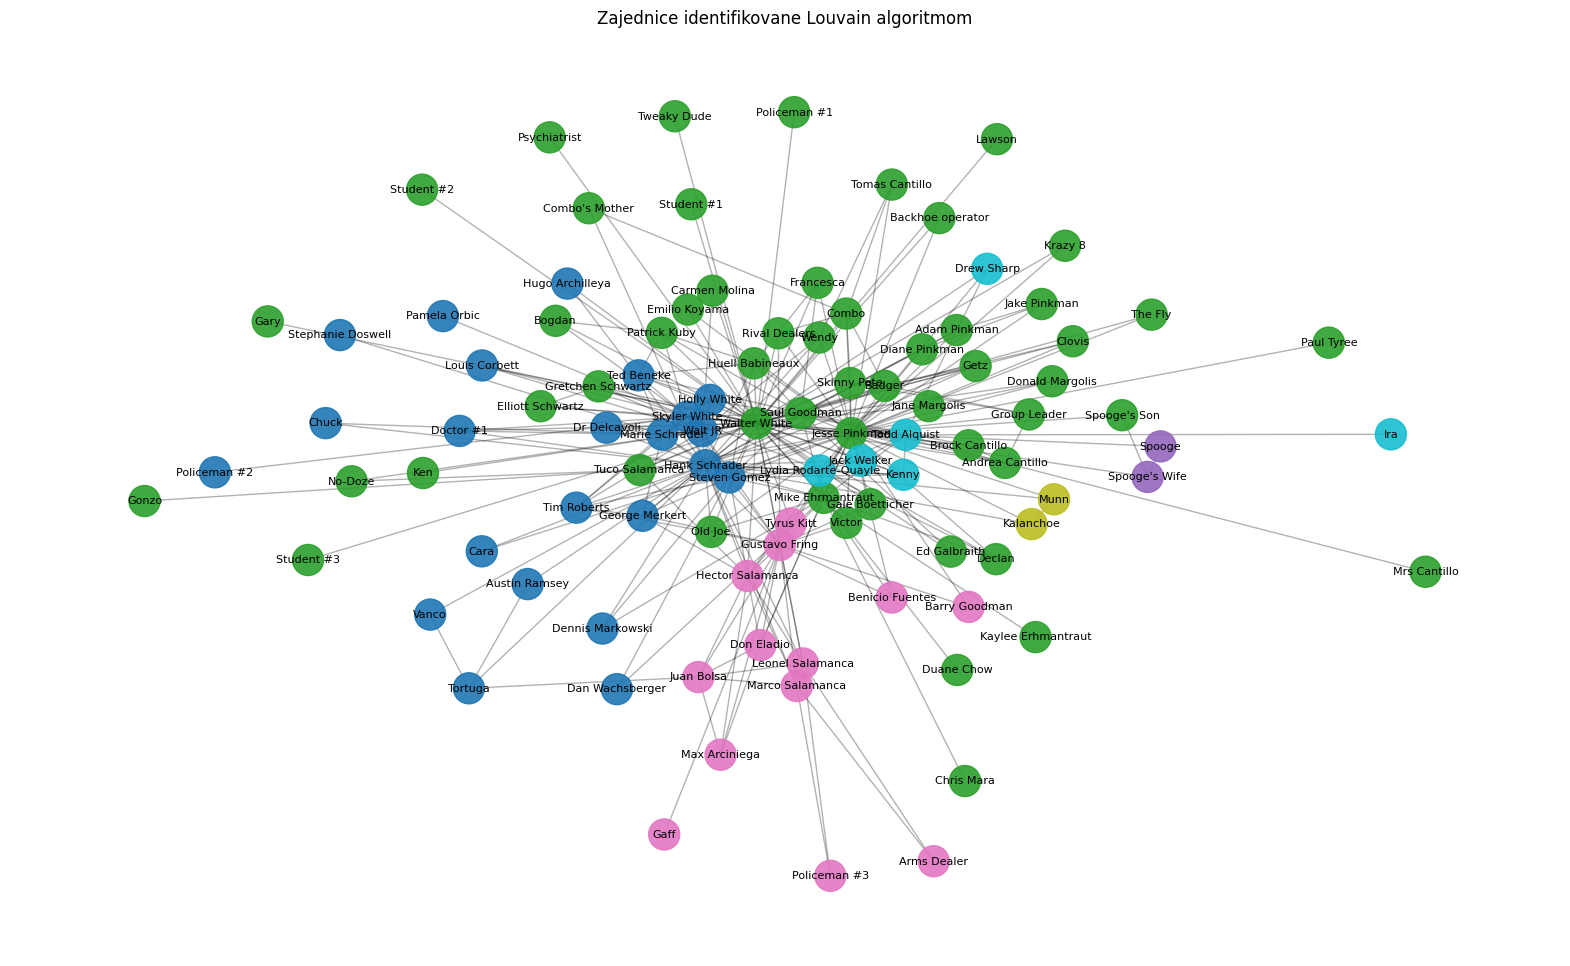

In [53]:
from networkx.algorithms.community.quality import modularity

node_colors_new = [community_map[n] for n in G.nodes()]
plt.figure(figsize=(20,12))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos,node_color=node_colors_new,cmap=plt.cm.tab10,node_size=500,alpha=0.9)

nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Zajednice identifikovane Louvain algoritmom")
plt.axis("off")
plt.show()

Korišćenjem metode modularity, mogli smo da odredimo kolika je modularnost samih zajednica, odnosno koliko su zajednice odvojene od ostatka mreže. 
Sa tim što je rezultat modularnosti dobijen kao 0.26, možemo zaključiti da je dobijena slaba klasterska struktura, što znači da se dosta prepliću interakcije između zajednica.  

Da bi testirali rezultate uporedili smo louvian modularnost sa metodom greedy_modularity_communities. Ovaj drugo rezultat je jako sličan prvom, čak se aproksimiraju na iste prve dve decimale, što nam može ukazati da je sama struktura jako stabilna.

In [55]:
mod = modularity(G, communities, weight='weight')
print("Modularnost:", mod)

from networkx.algorithms.community import greedy_modularity_communities

greedy_coms = list(greedy_modularity_communities(G, weight='weight'))
mod_greedy = modularity(G, greedy_coms, weight='weight')

print("Modularnost (Greedy):", mod_greedy)


Modularnost: 0.26043338643048086
Modularnost (Greedy): 0.26092831682042505


Korišćenjem metode bridges pronalazimo mostove u grafu, to jest ivica čije uklanjanje razdvaja graf. Ovo su uglavnom likovi čije su interakcije obično samo u jednoj sceni i sa jednim od glavnih likova. Na primer Walter i njegovi studenti, Skyler i njen advokat, Mike i njegova unuka i Mike sa njegovim ljudima.

In [21]:
bridges = list(nx.bridges(G))
print("Mostovi u mrezi: ", bridges)

Mostovi u mrezi:  [('Walter White', 'Student #1'), ('Walter White', 'Student #2'), ('Walter White', 'Ken'), ('Walter White', 'Psychiatrist'), ('Walter White', 'Student #3'), ('Walter White', 'Tweaky Dude'), ('Walter White', 'Policeman #1'), ('Walter White', 'Lawson'), ('Walter White', 'Gary'), ('Jesse Pinkman', 'Paul Tyree'), ('Skyler White', 'Pamela Orbic'), ('Skyler White', 'Policeman #2'), ('Marie Schrader', 'Stephanie Doswell'), ('Tuco Salamanca', 'Gonzo'), ('Gustavo Fring', 'Gaff'), ('Mike Ehrmantraut', 'Kaylee Erhmantraut'), ('Mike Ehrmantraut', 'Duane Chow'), ('Mike Ehrmantraut', 'Chris Mara'), ('Andrea Cantillo', 'Mrs Cantillo'), ('Todd Alquist', 'Ira')]
